# Exercise: Polynomial Regression and KNN


A) Use the Auto dataset, find the $R^2$ score of a linear regression model that predicts the miles per gallon (mpg) from the horsepower.

Hints:

    Create model object using: model=LinearRegression()

    Fit the model: fitted_model=model.fit(X_train,Y_train)

    Find the R squared metric using: fitted_model.score(X_test,Y_test)


<class 'pandas.core.frame.DataFrame'>
      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
5    15.0          8         429.0         198    4341          10.0    70   
6    14.0          8         454.0         220    4354           9.0    70   
7    14.0          8         440.0         215    4312           8.5    70   
8    14.0          8         455.0         225    4425          10.0    70   
9    15.0          8         390.0         190    3850           8.5    70   
10   15.0          8         383.0         170    3563          10.0    70   
11   14.0          8      

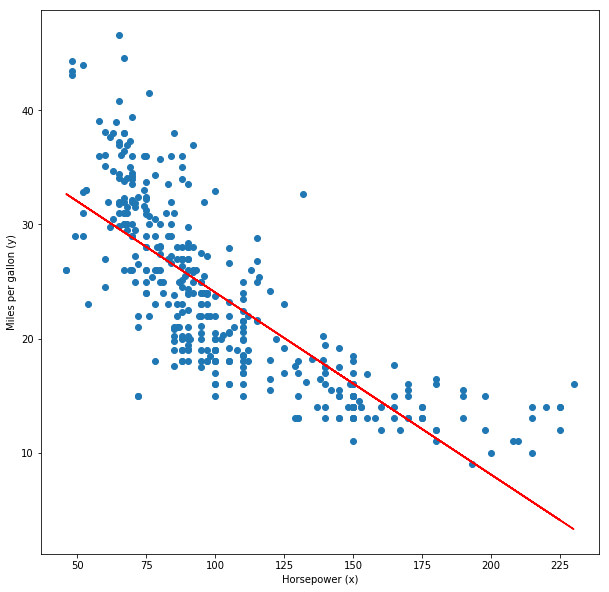

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

AutoData=read_csv('Auto_modify.csv') # read the data
print(type(AutoData))
print(AutoData)
X_auto_hp=AutoData.horsepower.values.reshape(-1,1) # define features: horsepower 
Y_auto_mpg=AutoData.mpg.values.reshape(-1,1) # define label: miles per gallon

X_train, X_test, Y_train, Y_test= train_test_split(X_auto_hp, Y_auto_mpg, random_state= 0)

modelAuto=LinearRegression()
Auto_fitted_model=modelAuto.fit(X_train,Y_train)
R2_auto_hp=Auto_fitted_model.score(X_test,Y_test)
print('R squared score of linear regression with hp features only is:', R2_auto_hp)

#estimated model
estimated_linearmodel=Auto_fitted_model.coef_ * X_auto_hp + Auto_fitted_model.intercept_

#ploting data points and estimated model
plt.figure(figsize=(10,10))
plt.scatter(X_auto_hp, Y_auto_mpg, marker= 'o')
plt.plot(X_auto_hp, estimated_linearmodel, 'r-')
#plt.title('Least-squares linear regression')
plt.xlabel('Horsepower (x)')
plt.ylabel('Miles per gallon (y)')



B) Use polynomial regression to include both the horsepower feature and $(horsepower)^2$ in the regression model. Find the $R^2$ metric. 

Hint: You can use [numpy.concatenate](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.concatenate.html). For example to add to an array U a column vector $W^2$, we can use X=np.concatenate((U,W**2),axis=1)


C) Optional: repeat (B) increase the degree of the polynomial to 3,then 4, then 5 and check the accuracy in each case.


In [9]:
# write code here
modelAuto2=LinearRegression()

X=X_auto_hp
for power in [1,2,3,4,5]:
    if power>1:
        X=np.concatenate((X,X_auto_hp**power),axis=1)
        
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y_auto_mpg, random_state= 0)
    Auto_fitted_model2=modelAuto2.fit(X_train,Y_train)
    R2_auto_hp=Auto_fitted_model2.score(X_test,Y_test)
    print('With polynomial of degree', power, 'the R squared score of linear regression is:', R2_auto_hp)


With polynomial of degree 1 the R squared score of linear regression is: 0.62176588114
With polynomial of degree 2 the R squared score of linear regression is: 0.727103150464
With polynomial of degree 3 the R squared score of linear regression is: 0.728238860119
With polynomial of degree 4 the R squared score of linear regression is: 0.729574758258
With polynomial of degree 5 the R squared score of linear regression is: 0.732051116484


D) Use KNN regression to predict the miles per gallon(mpg) with K=7, and find $R^2$ metric in the following cases 

- One feature: Horsepower only

- Two features: horsepower and (horsepower)2 

Hint: 

    Create KNN regression object using neighbors.KNeighborsRegressor:

    knnRegression = neighbors.KNeighborsRegressor(n_neighbors=7)

    Use the .fit and .score methods as before

E) COMMENT on your results: which model performs better? How does performance change when adding the quadratic feature?


In [11]:
from sklearn import neighbors
# add you code here 

knnRegression = neighbors.KNeighborsRegressor(n_neighbors=7)
X=X_auto_hp
for power in [1,2,3,4,5]:
    if power>1:
        X=np.concatenate((X,X_auto_hp**power),axis=1)
        
    X_train, X_test, Y_train, Y_test= train_test_split(X, Y_auto_mpg, random_state= 0)
    
    Auto_fitted_model2=knnRegression.fit(X_train,Y_train)
    R2_auto_hp=knnRegression.score(X_test,Y_test)
    print("Including feature of hoursepower to the power of", power, ", R squared score of KNN regression is", R2_auto_hp)

Including feature of hoursepower to the power of 1 , R squared score of KNN regression is 0.667477744171
Including feature of hoursepower to the power of 2 , R squared score of KNN regression is 0.670108404882
Including feature of hoursepower to the power of 3 , R squared score of KNN regression is 0.669744352888
Including feature of hoursepower to the power of 4 , R squared score of KNN regression is 0.669500193018
Including feature of hoursepower to the power of 5 , R squared score of KNN regression is 0.669500193018


Comments: 
- KNN performs better that linear regression with a single feature (horsepower)
- Linear regression performs better than KNN when the non-linear terms are added
- (As number of features increases beyond 4, KNN regression performs degrades)